In [1]:
import pandas as pd
data=pd.read_csv("FAOLEX_All.csv")
print(data.keys())

Index(['Record Id', 'Record URL', 'Document URL', 'Title', 'Original title',
       'Date of original text', 'Last amended date', 'Available website',
       'Language of document', 'Country/Territory', 'Regional organizations',
       'Territorial subdivision', 'Type of text', 'Repealed', 'Abstract',
       'Primary subjects', 'Domain', 'Keywords'],
      dtype='object')


In [2]:
import nltk
keywords=list(data["Keywords"])
country=list(data["Country/Territory"])
i=0
# Split alle keywords op i en liste og ændrer nan til at være en str med Nan
for words in keywords:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    if type(country[i])!=str:
        country[i]="NaN"
    keywords[i]=words.split(";")
    i+=1



In [3]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import numpy as np
stemmer = SnowballStemmer("english")
stemmed_words=[]
for i in range(len(keywords)):
    stemmed_words.append([stemmer.stem(word) for word in keywords[i]])



In [4]:
print(keywords[15])
print(stemmed_words[15])


['marine fisheries', ' traditional rights/customary rights', ' fishing authorization', ' allocation/quota', ' fishery management and conservation']
['marine fisheri', ' traditional rights/customary right', ' fishing author', ' allocation/quota', ' fishery management and conserv']


# Top2vec topic model

In [5]:
# Make a top2vec topic model
from top2vec import Top2Vec
i=0
for word in keywords:
    keywords[i]="".join(word)
    i+=1
model = Top2Vec(keywords,embedding_model="doc2vec")


C:\Users\Jacob pc\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Jacob pc\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Jacob pc\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([1536, 1414, 1253, ...,   21,   20,   19], dtype=int64)

In [7]:
model.get_num_topics()

1202

In [8]:
topic_words,word_scores,topic_nums = model.get_topics(5)

In [9]:
print(topic_words)

[['territorial' 'continental' 'maritime' 'shelf' 'exclusive' 'eez' 'sea'
  'economic' 'zone' 'high' 'seas' 'deep' 'sovereignty' 'navigation'
  'bycatch' 'total' 'foreign' 'fishing' 'allowable' 'port' 'mesh'
  'harbour' 'catch' 'transshipment' 'method' 'coastal' 'marine'
  'diadromous' 'bed' 'fishery' 'charge' 'vessel' 'landing' 'fisheries'
  'cartilaginous' 'exploration' 'artisanal' 'unregulated' 'illegal'
  'state' 'fishes' 'migratory' 'mammals' 'unreported' 'size' 'iuu'
  'protected' 'allocation' 'survey' 'mining']
 ['steroids' 'toxicity' 'hormones' 'poisoning' 'veterinary' 'limit'
  'maximum' 'residue' 'mrl' 'residues' 'drugs' 'feedstuffs' 'feed'
  'procedures' 'additives' 'vaccination' 'hygiene' 'slaughtering' 'swine'
  'sanitary' 'treated' 'poultry' 'haccp' 'safety' 'animal' 'meat' 'amr'
  'stock' 'antimicrobial' 'welfare' 'quarantine' 'resistance'
  'disinfection' 'packaging' 'labelling' 'pests' 'codex' 'cattle'
  'equine' 'pesticides' 'disinfestation' 'inspection' 'alimentarius'

In [10]:
# Find documents most similar to a specific topic
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=110, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 120333, Score: 0.969001829624176
-----------
agricultural development institution agricultural development institution
-----------

Document: 100016, Score: 0.9669259786605835
-----------
institution agricultural development institution agricultural development institution agricultural development
-----------

Document: 27599, Score: 0.9657785892486572
-----------
institution agricultural development institution agricultural development institution agricultural development institution
-----------

Document: 71642, Score: 0.965630054473877
-----------
agricultural development institution
-----------

Document: 130087, Score: 0.9648650884628296
-----------
agricultural development sustainable development institution agricultural development sustainable development institution
-----------

Document: 112157, Score: 0.9612683057785034
-----------
agricultural development institution
-----------

Document: 121806, Score: 0.9597458839416504
-----------
institution agricultural devel

In [11]:
# Check documents
data.iloc[85707]

Record Id                                                     LEX-FAOC103851
Record URL                 http://www.fao.org/faolex/results/details/en/c...
Document URL                   https://faolex.fao.org/docs/pdf/bi-103851.pdf
Title                      Resolución Nº 4/011 - Fíjase en 6.500 tonelada...
Original title                                                           NaN
Date of original text                                             28-06-2011
Last amended date                                                        NaN
Available website                                                        NaN
Language of document                                                 Spanish
Country/Territory                                         Argentina; Uruguay
Regional organizations                                                 CTMFM
Territorial subdivision                                                  NaN
Type of text                                                       Agreement

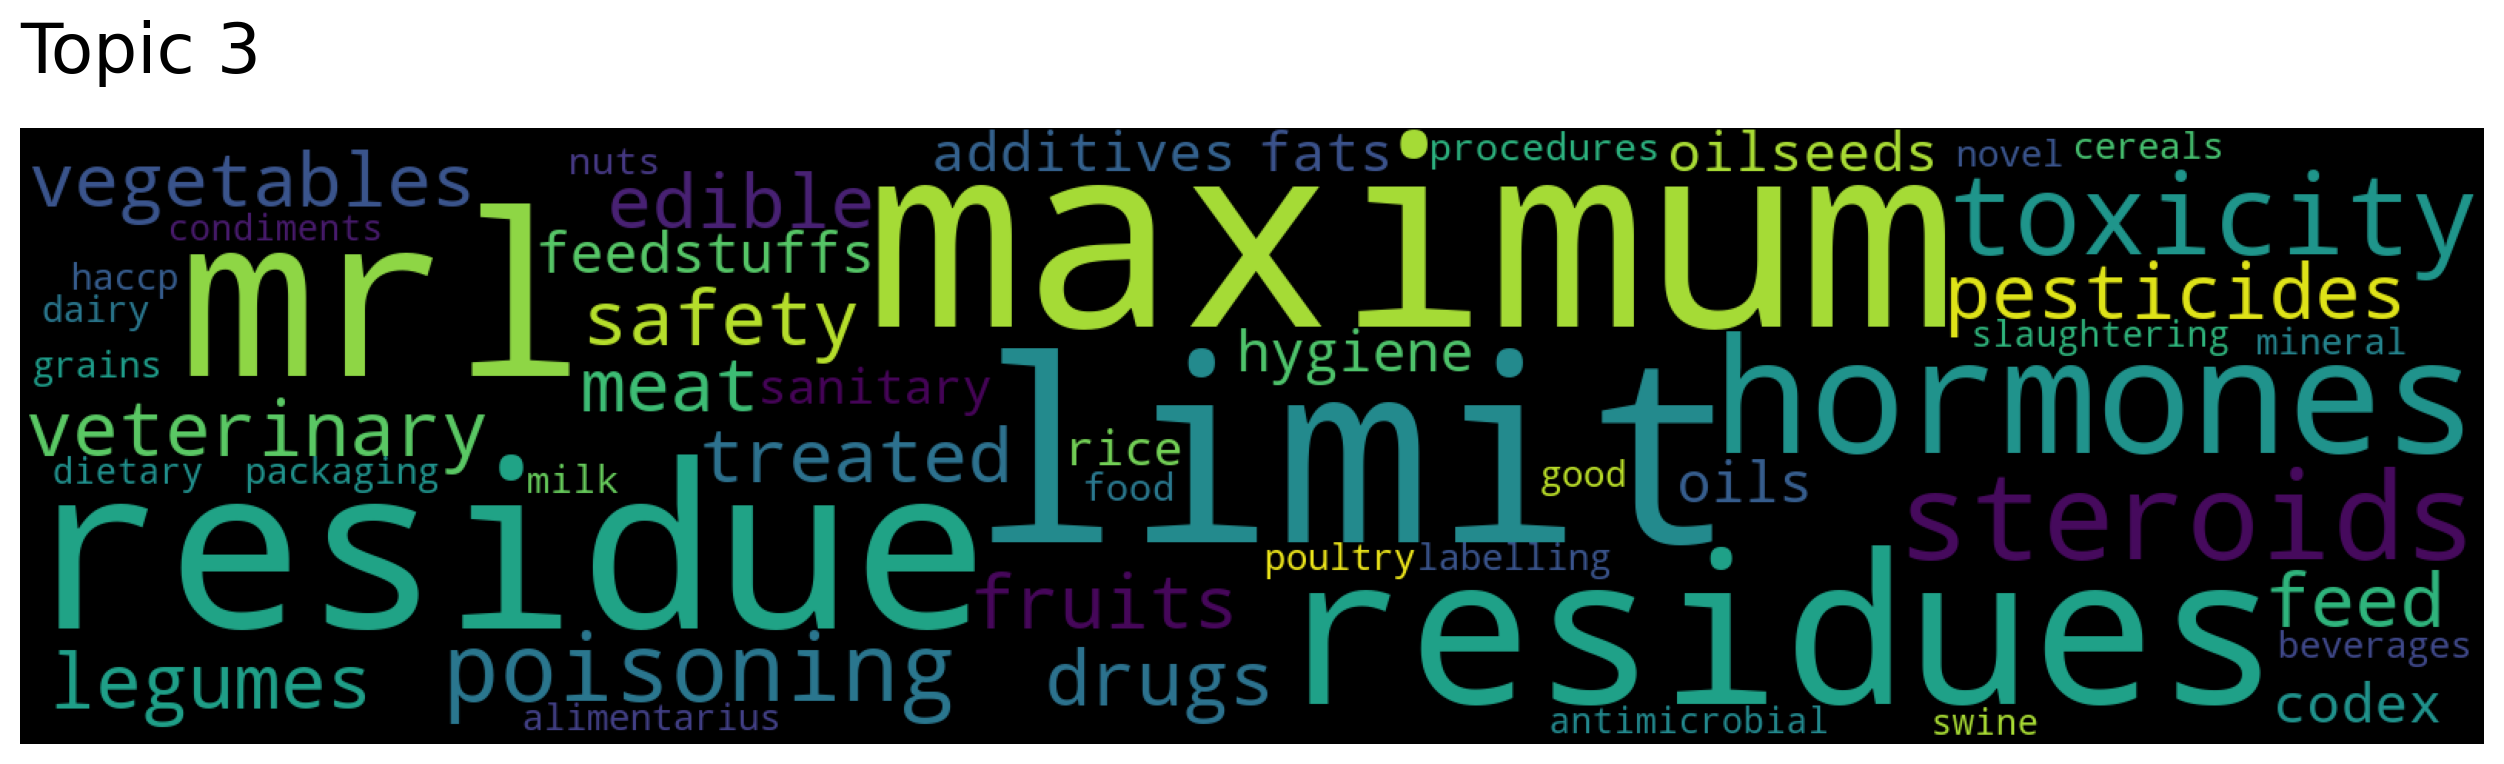

In [12]:
model.generate_topic_wordcloud(3)

In [13]:
# Look up topics corresponding to a keyword
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["waste"], num_topics=10)
print(topic_words)
print(topic_nums)
print(topic_scores)

[array(['polluter', 'pays', 'domestic', 'waste', 'prevention', 'sources',
       'solid', 'principle', 'reuse', 'recycling', 'disposal', 'movement',
       'effluent', 'hazardous', 'control', 'pollution', 'plastic',
       'precautionary', 'substances', 'ozone', 'air', 'discharge',
       'circular', 'audit', 'emissions', 'impact', 'environmental',
       'noise', 'charges', 'rehabilitation', 'eia', 'layer', 'economy',
       'sewerage', 'freshwater', 'healthy', 'transboundary', 'water',
       'participation', 'clean', 'assessment', 'environment', 'bioenergy',
       'compensation', 'prior', 'industrial', 'soil', 'change',
       'liability', 'payments'], dtype='<U15'), array(['sources', 'domestic', 'waste', 'solid', 'prevention', 'disposal',
       'reuse', 'movement', 'recycling', 'hazardous', 'plastic',
       'polluter', 'effluent', 'pollution', 'pays', 'substances',
       'control', 'discharge', 'circular', 'principle', 'noise',
       'environmental', 'audit', 'freshwater', 'ec

## Country co-occurence

- For hver tekst, find tilhørende topic --> noter landet til denne topic

In [14]:
# Compute unqie countries --> i.e. remove agreement "countries" 
country_new=[]
for coun in country:
    if len(coun.split(";"))>=2:
        for c in coun.split("; "):
            country_new.append(c)
    else:
        country_new.append(coun)

In [ ]:
# Make country dict --> key: country, value: country index
countries = {}
i=0
for country_x in (list(set(country_new))):
    countries[country_x]=i
    i+=1

In [15]:
# Compute country co-occurence matrix
topic_sizes, topic_nums = model.get_topic_sizes()
country_topic_matrix = np.zeros((len(set(country_new)),len(topic_nums)))

for num in topic_nums:
    # For each topic get the corresponding documents
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=num,num_docs=topic_sizes[num])
    for id in document_ids:
        # Find the documents' countries and add it to the co-occurence matrix
        if len(country[id].split(";"))>=2:
            for c in country[id].split("; "):
                 country_topic_matrix[countries[c],num] +=1
        else:
            country_topic_matrix[countries[country[id]],num] +=1

        

In [16]:
country_co_ocurrence = np.matmul(country_topic_matrix,country_topic_matrix.T)
np.shape(country_co_ocurrence)

(2042, 2042)

In [17]:
topic_sizes, topic_nums = model.get_topic_sizes()
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3,num_docs=topic_sizes[3])
for id in document_ids:
    print(country[id])

print(document_ids[13])


France
Ireland
United Kingdom of Great Britain and Northern Ireland
Italy
Belgium
European Union
France
Belgium
European Union
France
France
Greece
Ireland
Belgium
United Kingdom of Great Britain and Northern Ireland
Portugal
Ireland
Belgium
Ireland
European Union
Portugal
Belgium
Belgium
France
Belgium
European Union
European Union
Italy
Portugal
European Union
Ireland
Italy
Malta
Malta
France
Belgium
Ireland
European Union
Bulgaria
Italy
Ireland
Italy
European Union
United Kingdom of Great Britain and Northern Ireland
Greece
Greece
Greece
Ireland
Luxembourg
Greece
Belgium
Malta
United Kingdom of Great Britain and Northern Ireland
Italy
United Kingdom of Great Britain and Northern Ireland
France
Ireland
European Union
Belgium
Ireland
Ireland
Greece
Germany
France
Belgium
United Kingdom of Great Britain and Northern Ireland
European Union
United Kingdom of Great Britain and Northern Ireland
France
France
Spain
Italy
Greece
France
Spain
Greece
Australia
European Union
Germany
European U

# Forskellige topic reduction

In [18]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=200)

In [19]:
print(model.topic_words_reduced)

[['steroids' 'hormones' 'toxicity' ... 'dairy' 'sheep' 'reproduction']
 ['territorial' 'continental' 'shelf' ... 'survey' 'commercial'
  'allocation']
 ['floriculture' 'seeds' 'material' ... 'ipm' 'disinfection' 'trade']
 ...
 ['soil' 'rehabilitation' 'improvement' ... 'minerals' 'payment' 'forest']
 ['protected' 'areas' 'area' ... 'flora' 'maritime' 'size']
 ['dietary' 'uses' 'breastfeeding' ... 'potable' 'fibre' 'haccp']]


In [20]:
model.topic_words_reduced[4]

array(['timber', 'extraction', 'forest', 'service', 'logging', 'clearing',
       'wood', 'fires', 'forestry', 'reforestation', 'inventory',
       'fuelwood', 'afforestation', 'recreational', 'agro', 'concession',
       'payments', 'private', 'collecting', 'mountain', 'lease', 'for',
       'payment', 'services', 'contracts', 'parks', 'transfer',
       'measures', 'grazing', 'wildlife', 'capture', 'planting', 'pes',
       'conservation', 'customary', 'harvesting', 'adverse', 'community',
       'prescription', 'erosion', 'dispute', 'species', 'hunting',
       'servitude', 'fees', 'possession', 'protected', 'material',
       'common', 'zoning'], dtype='<U15')

In [21]:
topic_words,word_scores,topic_nums = model.get_topics(10)
topic_words

array([['territorial', 'continental', 'maritime', 'shelf', 'exclusive',
        'eez', 'sea', 'economic', 'zone', 'high', 'seas', 'deep',
        'sovereignty', 'navigation', 'bycatch', 'total', 'foreign',
        'fishing', 'allowable', 'port', 'mesh', 'harbour', 'catch',
        'transshipment', 'method', 'coastal', 'marine', 'diadromous',
        'bed', 'fishery', 'charge', 'vessel', 'landing', 'fisheries',
        'cartilaginous', 'exploration', 'artisanal', 'unregulated',
        'illegal', 'state', 'fishes', 'migratory', 'mammals',
        'unreported', 'size', 'iuu', 'protected', 'allocation', 'survey',
        'mining'],
       ['steroids', 'toxicity', 'hormones', 'poisoning', 'veterinary',
        'limit', 'maximum', 'residue', 'mrl', 'residues', 'drugs',
        'feedstuffs', 'feed', 'procedures', 'additives', 'vaccination',
        'hygiene', 'slaughtering', 'swine', 'sanitary', 'treated',
        'poultry', 'haccp', 'safety', 'animal', 'meat', 'amr', 'stock',
        'antim

# Data analyse

In [22]:
print(keywords[15])
print(len(keywords[15]))

marine fisheries traditional rights/customary rights fishing authorization allocation/quota fishery management and conservation
127


In [23]:
# Tæl hvor mange der er repealed inden for et dato interval
dates=data["Date of original text"]
repealed=data["Repealed"]
antal=0
for i in range(1800,2022):
    c=dates==str(i)
    d=repealed=="Y"
    antal+=sum(c*d)
print(antal)


971


In [24]:
#Append country to keywords -- outdated
#i=0

#for words in keywords:
 #   keywords[i]=words + [" "+country[i]]
  #  i+=1

In [25]:
# Find number of extinct domains
a= list(set(data["Domain"]))
i=0
for words in a:
    if type(words)!=str:
        #print("type= ",type(words)," Index = ", i)
        words="Nan"
    a[i]=words.split(";")

    i+=1

In [26]:
# print different domains
a=sum(a,[])
i=0
for word in a:
        word=word.strip()
        a[i]=word
        i+=1

print(set(a))



{'Food & nutrition', 'Water', 'Nan', 'Mineral resources', 'Fisheries', 'General', 'Sea', 'Wild species & ecosystems', 'Land & soil', 'Forestry', 'Air & atmosphere', 'Energy', 'Livestock', 'Environment', 'Agriculture', 'Cultivated plants', 'Waste & hazardous substances'}


In [27]:
# Count number documents in a language
languages=list(data["Language of document"])
print(languages.count("English"))

54324


In [28]:
set(country)

{'Denmark; Greenland (Denmark)',
 'Mexico; Spain',
 'Taiwan Province of China; Marshall Islands',
 'Iraq',
 'Germany; North Macedonia',
 'Belarus; Italy',
 "Benin; Burkina Faso; Côte d'Ivoire; Guinea; Libya; Mali; Niger; Nigeria; Togo",
 'Albania; North Macedonia',
 'Argentina; United Kingdom of Great Britain and Northern Ireland',
 'Iceland; Norway',
 'United States of America; Poland',
 'Netherlands (Kingdom of the)',
 'Liechtenstein',
 'Türkiye; Indonesia',
 'Australia; France; New Caledonia (France); Norfolk Island (Australia)',
 'Spain; Portugal',
 'China; India',
 'France; Mayotte (France)',
 'European Union; Dominica',
 'Senegal; Guinea-Bissau',
 'France; Germany; Luxembourg; Netherlands (Kingdom of the); Switzerland; European Union',
 'Belarus; Lithuania',
 'Russian Federation; Slovenia',
 'Argentina; Guatemala',
 'Uzbekistan; Kyrgyzstan',
 'Switzerland; South Africa',
 'Tajikistan; Ukraine',
 'Portugal; Netherlands (Kingdom of the)',
 'Lebanon; Gabon',
 'Estonia; Faroe Islands

- Cluster topics
- Dendogram

In [ ]:


# Graph representation


In [46]:
# swap dict

def get_swap_dict(d):
    return {v: k for k, v in d.items()}

countries_swap = get_swap_dict(countries)



KeyError: 100

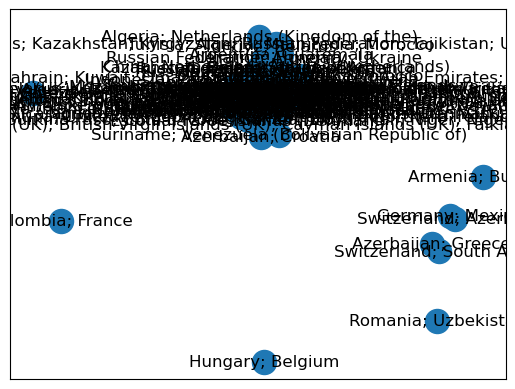

In [45]:

from networkx.algorithms.community import girvan_newman
import networkx as nx
import itertools

G = nx.Graph()

size = 100

G.add_nodes_from(range(size))

for i in range(size):
        for j in range(i+1, size):
            if country_co_ocurrence[i, j] != 0.0:
                G.add_edge(i, j, weight=country_co_ocurrence[i, j])


nx.draw_networkx(G, labels=countries_swap,with_labels=True)


In [48]:

k = 20

comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

#nx.draw_networkx(comp, with_labels=True)





([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98], [9], [25, 84], [41], [60, 86], [65], [73], [74], [99])
([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98], [9], [25, 84], [34], [41], [60, 86], [65], [73], [74], [99])
([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 51,